In [2]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

$$ \textit{Euclidean distance}(a, b) = \sqrt{ (a_1 - b_1)^2 + ... + (a_N - b_N)^2 } = \sqrt{ \sum_{i=0}^{i=N} (a_{i} - b_{i})^2 } $$

In [3]:
def euclidean_distance(point1: np.array, point2: np.array) -> float:
    return np.sqrt(np.sum(np.power(point1 - point2, 2)))

## K-nearest neighbors

In [4]:
class KNN:
    def __init__(self, k: int) -> None:
        # Ініціалізація класу KNN з параметром k - кількість сусідів, яку будемо враховувати
        self._X_train = None  # Навчальні дані
        self._y_train = None  # Відповіді на навчальних даних
        self.k = k  # Кількість сусідів для урахування при класифікації

    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        # Метод для навчання моделі, отримує на вхід навчальні дані X_train та відповіді y_train
        self._X_train = X_train  # Зберігаємо навчальні дані
        self._y_train = y_train  # Зберігаємо відповіді

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        # Метод для класифікації тестових даних X_test
        n = X_test.shape[0]  # Кількість тестових екземплярів
        y_pred = np.empty(n, dtype=self._y_train.dtype)  # Масив для зберігання передбачених класів

        for i in range(n):
            # Для кожного тестового екземпляру обчислюємо відстані до всіх точок навчальних даних
            distances = np.zeros(len(self._X_train))
            for j in range(len(self._X_train)):
                distances[j] = euclidean_distance(self._X_train[j], X_test[i])

            # Знаходимо індекси k найближчих точок
            k_indices = np.argsort(distances)[:self.k]
            # Отримуємо класи цих k найближчих точок
            k_nearest_labels = self._y_train[k_indices]

            # Обираємо клас, який зустрічається найчастіше серед k найближчих точок
            y_pred[i] = np.bincount(k_nearest_labels).argmax()

        return y_pred

In [25]:
n_classes = 3
X_train, y_train = make_blobs(n_samples=1000, n_features=10, centers=n_classes, random_state=42)

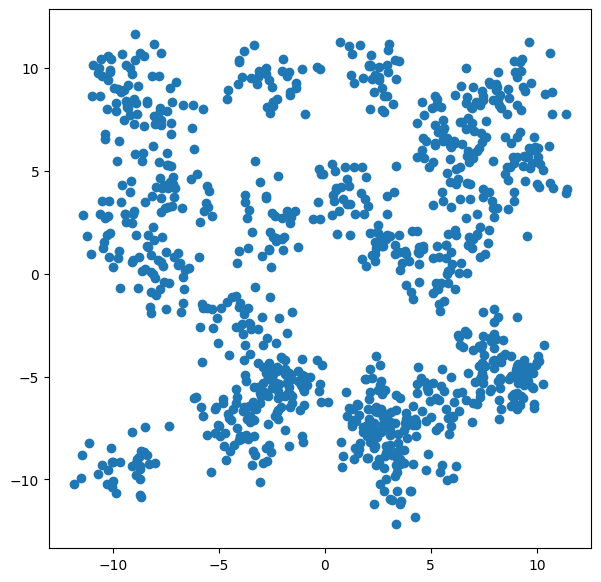

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1])

In [23]:
model = KNN(k=n_classes)
model.fit(X_train, y_train)

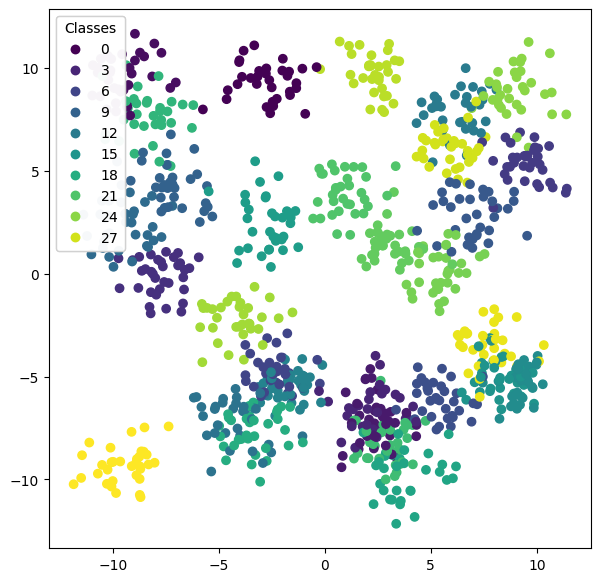

In [24]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
ax.add_artist(legend1);

## K-means

In [8]:
class KMeans:
    def __init__(self, n_clusters: int = 3, max_iterations: int = 1000, random_state: int = 42) -> None:
        # Ініціалізація класу KMeans з параметрами кількості кластерів, максимальної кількості ітерацій та випадкового стану
        self.n_clusters = n_clusters  # Кількість кластерів
        self.max_iterations = max_iterations  # Максимальна кількість ітерацій
        self.random_state = np.random.RandomState(random_state)  # Випадковий стан для відтворюваності результатів

    def predict(self, X) -> Tuple[np.ndarray, np.ndarray]:
        # Метод для кластеризації даних X
        n_samples, n_features = X.shape  # Кількість зразків та ознак у вхідних даних

        # Ініціалізація початкових центроїдів, обираючи їх випадковим чином серед індексів зразків
        centroid_idxs = self.random_state.choice(n_samples, size=self.n_clusters, replace=False)
        centroids = X[centroid_idxs]

        for _ in range(self.max_iterations):
            # На кожній ітерації присвоюємо кожен зразок до найближчого центроїду
            labels = np.zeros(n_samples, dtype=int)
            for i in range(n_samples):
                distances = [
                    euclidean_distance(X[i], centroid)
                    for centroid in centroids
                ]
                labels[i] = np.argmin(distances)  # Індекс найменшої відстані - номер кластера

            # Оновлення центроїдів на основі призначених зразків
            new_centroids = np.zeros_like(centroids)
            for c in range(self.n_clusters):
                points = X[labels == c]
                new_centroids[c] = np.mean(points, axis=0)  # Середнє значення по зразкам

            # Перевірка, чи змінилися центроїди
            if np.allclose(new_centroids, centroids):
                print("Центроїди майже не змінилися, виходимо...")
                break

            centroids = new_centroids

        return centroids, labels

Центроїди майже не змінилися, виходимо...
[[ 1.91409851 -3.49566178 -7.09175239  2.42587278  0.77054493  3.28838206
  -0.76686532 -2.6895094   2.28292491 -4.9473091 ]
 [-6.59389814  7.62284036  5.5222032  -0.71527899 -2.60151371 -4.38561781
  -4.10089469  2.13178707 -2.85390529 -2.7080245 ]
 [ 3.59764513  0.39207026  7.54905082  2.50096278 -1.1163834   4.59182708
  -7.72126575 -0.07382697 -8.87358806  3.07337068]]


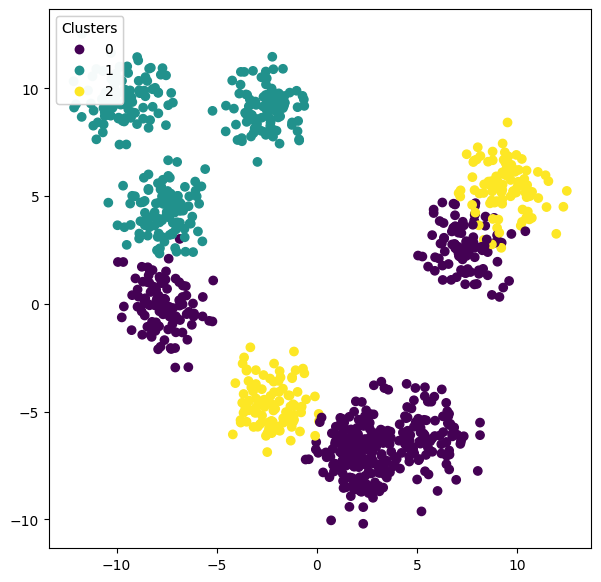

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
centroids, clusters = kmeans.predict(X_train)
print(centroids)

fig, ax = plt.subplots(figsize=(7, 7))
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=clusters)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
ax.add_artist(legend1);